# Tiền xử lý cơ bản

In [88]:
library(janitor)
library(tidyverse)
library(ggplot2)

In [89]:
data <- read.csv("../data/diabetes_012_health_indicators_BRFSS2015.csv", na=c("", "NA", "N/A")) |> clean_names()
glimpse(data)

Rows: 253,680
Columns: 22
$ diabetes_012           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,…
$ high_bp                <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,…
$ high_chol              <dbl> 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,…
$ chol_check             <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ bmi                    <dbl> 40, 25, 28, 27, 24, 25, 30, 25, 30, 24, 25, 34,…
$ smoker                 <dbl> 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,…
$ stroke                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ heart_diseaseor_attack <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ phys_activity          <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,…
$ fruits                 <dbl> 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,…
$ veggies                <dbl> 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,…
$ hvy_alcohol_consump    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ any_healthca

In [90]:
unique_counts <- data.frame(
    variable = names(data),
    unique_count = sapply(data, function(x) length(unique(x)))
)
qualitative_vars <- unique_counts |> filter(unique_count <= 13) |> pull(variable)
data[qualitative_vars] <- lapply(data[qualitative_vars], as.factor)

In [91]:
glimpse(data)

Rows: 253,680
Columns: 22
$ diabetes_012           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,…
$ high_bp                <fct> 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,…
$ high_chol              <fct> 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,…
$ chol_check             <fct> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ bmi                    <dbl> 40, 25, 28, 27, 24, 25, 30, 25, 30, 24, 25, 34,…
$ smoker                 <fct> 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,…
$ stroke                 <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ heart_diseaseor_attack <fct> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ phys_activity          <fct> 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,…
$ fruits                 <fct> 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,…
$ veggies                <fct> 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,…
$ hvy_alcohol_consump    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ any_healthca

# Chi Squared Test với biến định tính

Warning message in stats::chisq.test(x, y, ...):
“Chi-squared approximation may be incorrect”


,variable,chi_square,df,p_value
,<chr>,<dbl>,<int>,<dbl>
X-squared12,gen_hlth,24248.10615,8,0.000000e+00
X-squared,high_bp,18794.64405,2,0.000000e+00
X-squared13,diff_walk,12776.94189,2,0.000000e+00
X-squared1,high_chol,11258.92040,2,0.000000e+00
X-squared15,age,9641.37653,24,0.000000e+00
X-squared5,heart_diseaseor_attack,8244.88911,2,0.000000e+00
X-squared17,income,7816.46291,14,0.000000e+00
X-squared16,education,4560.64028,10,0.000000e+00
X-squared6,phys_activity,3789.30146,2,0.000000e+00


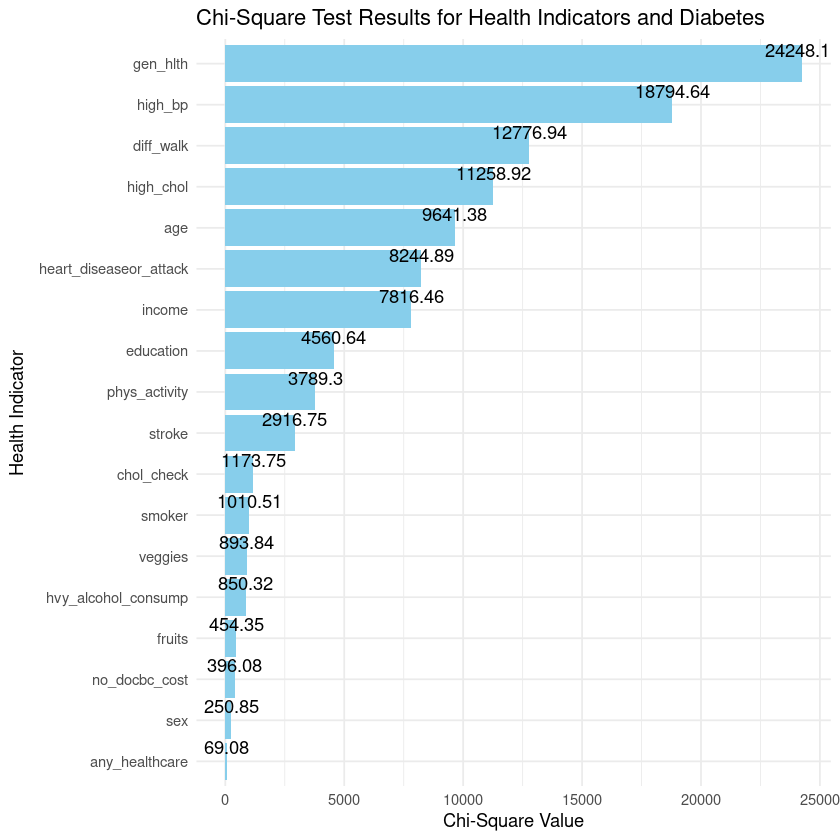

In [112]:
# Create a function to perform chi-square test and return results
chi_square_results <- lapply(qualitative_vars[qualitative_vars != "diabetes_012"], function(var) {
    contingency_table <- table(data[[var]], data$diabetes_012)
    chi_test <- chisq.test(contingency_table)
    
    data.frame(
        variable = var,
        chi_square = chi_test$statistic,
        df = chi_test$parameter,
        p_value = chi_test$p.value
    )
})

# Combine results into a single dataframe
results_df <- do.call(rbind, chi_square_results)
results_df <- results_df |>
    arrange(desc(chi_square)) #|>
    # mutate(p_value = format.pval(p_value))
results_df

# Plot the results
results_df |>
    ggplot(aes(x = reorder(variable, chi_square), y = chi_square)) +
    geom_bar(stat = "identity", fill = "skyblue") +
    geom_text(aes(label = round(chi_square, 2)), vjust = -0.5) +
    coord_flip() +
    labs(
        title = "Chi-Square Test Results for Health Indicators and Diabetes",
        x = "Health Indicator",
        y = "Chi-Square Value"
    ) +
    theme_minimal()

,variable,chi_square,p_value,signficance
,<chr>,<dbl>,<dbl>,<chr>
X-squared12,gen_hlth,24248.10615,9.999e-05,***
X-squared,high_bp,18794.64405,9.999e-05,***
X-squared13,diff_walk,12776.94189,9.999e-05,***
X-squared1,high_chol,11258.92040,9.999e-05,***
X-squared15,age,9641.37653,9.999e-05,***
X-squared5,heart_diseaseor_attack,8244.88911,9.999e-05,***
X-squared17,income,7816.46291,9.999e-05,***
X-squared16,education,4560.64028,9.999e-05,***
X-squared6,phys_activity,3789.30146,9.999e-05,***


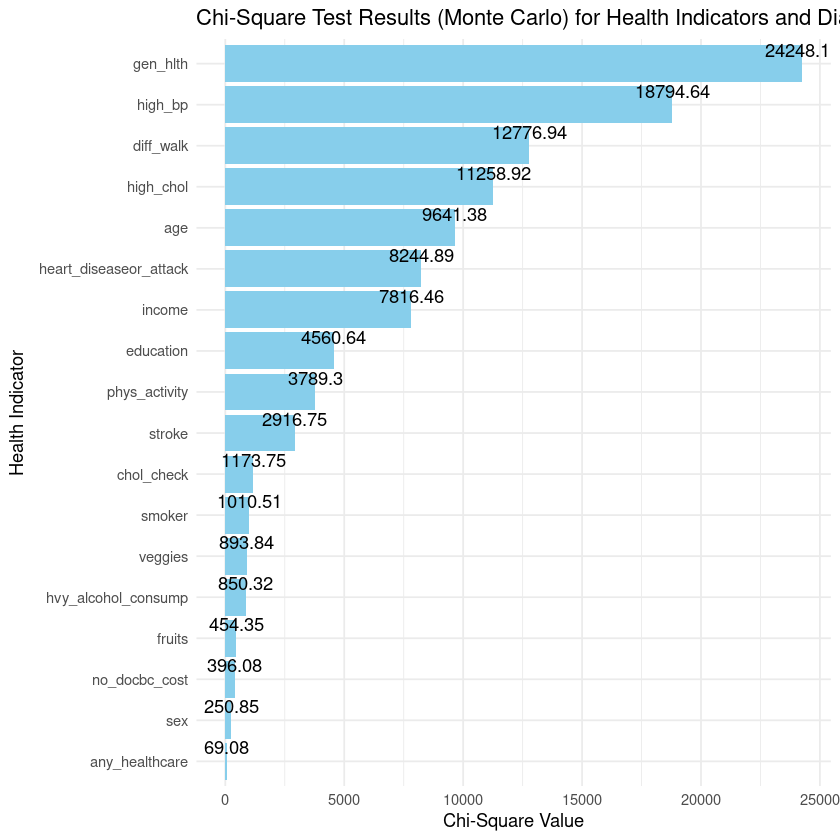

In [120]:
# Create a function to perform chi-square test with Monte Carlo simulation
set.seed(42)
chi_square_results <- lapply(qualitative_vars[qualitative_vars != "diabetes_012"], function(var) {
    contingency_table <- table(data[[var]], data$diabetes_012)
    chi_test <- chisq.test(contingency_table, simulate.p.value = TRUE, B = 10000)
    
    data.frame(
        variable = var,
        chi_square = chi_test$statistic,
        # df = chi_test$parameter,
        p_value = chi_test$p.value
    )
})

# Combine results into a single dataframe
results_df <- do.call(rbind, chi_square_results)
results_df <- results_df |>
    arrange(desc(chi_square)) |>
    mutate(
        signficance = case_when(
            p_value < 0.001 ~ "***",
            p_value < 0.01 ~ "**", 
            p_value < 0.05 ~ "*",
            TRUE ~ "ns"
        )
    )
results_df

# Plot the results
results_df |>
    ggplot(aes(x = reorder(variable, chi_square), y = chi_square)) +
    geom_bar(stat = "identity", fill = "skyblue") +
    geom_text(aes(label = round(chi_square, 2)), vjust = -0.5) +
    coord_flip() +
    labs(
        title = "Chi-Square Test Results (Monte Carlo) for Health Indicators and Diabetes",
        x = "Health Indicator",
        y = "Chi-Square Value"
    ) +
    theme_minimal()

## AB Testing

In [93]:
bmi <- data |> group_by(diabetes_012) |> summarise(mean_bmi = mean(bmi), sd_bmi = sd(bmi), count = n())
bmi

diabetes_012,mean_bmi,sd_bmi,count
<fct>,<dbl>,<dbl>,<int>
0,27.74252,6.260993,213703
1,30.72447,6.964898,4631
2,31.94401,7.363401,35346


Kết quả cho thấy số lượng người không bị tiểu đường chiếm đa số `213703`. Bên cạnh đó, chỉ số BMI trung bình của người bị tiểu đường cao hơn hẳn hai nhóm còn lại. Tuy nhiên, độ lệch chuẩn chỉ số BMI của nhóm bị tiểu đường cũng cao nhất, cho thấy độ biến động chỉ số BMI của nhóm này cao hơn nhóm không bị tiểu đường và tiền tiểu đường.

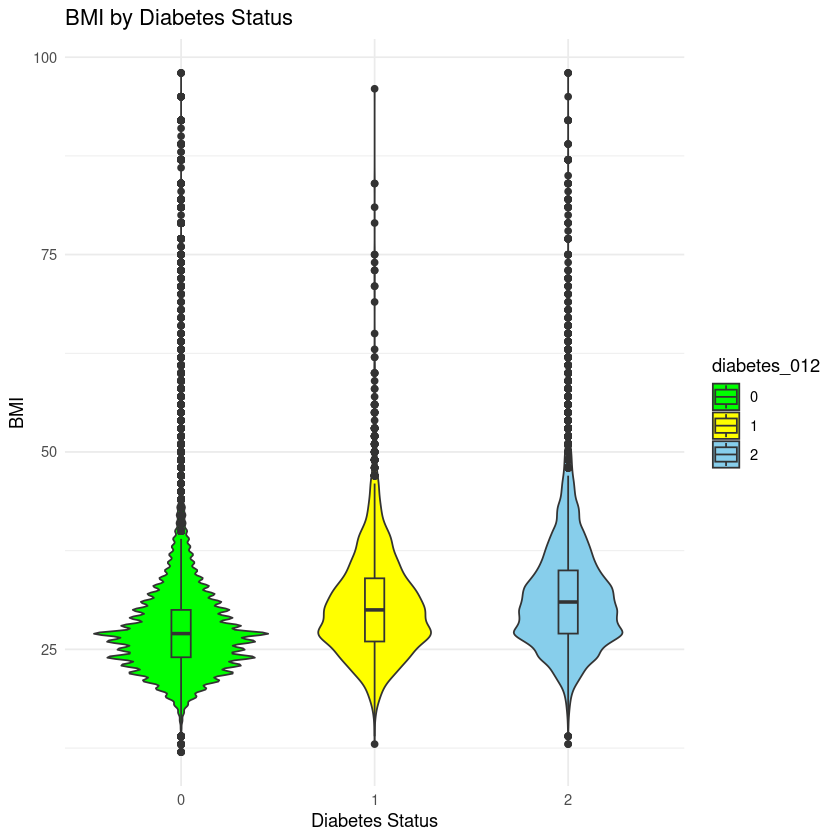

In [94]:
# Plot BMI by diabetes status,violin plot
ggplot(data, aes(x = diabetes_012, y = bmi,fill=diabetes_012)) +
    geom_violin() + geom_boxplot(width = 0.1) +
    scale_fill_manual(values = c("green", "yellow", "skyblue"),breaks = c("0","1","2")) +
    labs(title = "BMI by Diabetes Status",
         x = "Diabetes Status",
         y = "BMI") +
    theme_minimal()

Ta thực hiện kiểm định ANOVA để kiểm định về sự khác biệt về chỉ số BMI trung bình giữa ba nhóm bệnh nhân.

In [95]:
library(lmPerm)
set.seed(42)
aov_result <- aov(bmi ~ diabetes_012, data = data)
summary(aov_result)

                 Df   Sum Sq Mean Sq F value Pr(>F)    
diabetes_012      2   561268  280634    6768 <2e-16 ***
Residuals    253677 10518121      41                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Bảng kết quả này cho thấy biến `diabetes_012` (với 2 bậc tự do) giải thích một phần đáng kể biến thiên của `bmi` và có giá trị F rất lớn (6768) kèm p-value < 2e-16. Điều đó chứng tỏ sự khác nhau giữa các nhóm `diabetes_012` về giá trị `bmi` là có ý nghĩa thống kê rất cao (mức ý nghĩa ***).

In [96]:
ment_hlth <- data |> group_by(diabetes_012) |> summarise(mean_ment_hlth = mean(ment_hlth), sd_ment_hlth = sd(ment_hlth), count = n())
ment_hlth

diabetes_012,mean_ment_hlth,sd_ment_hlth,count
<fct>,<dbl>,<dbl>,<int>
0,2.944404,7.064440,213703
1,4.529907,8.897176,4631
2,4.461806,8.947717,35346


Ta nhận thấy có sự khác biệt về trung bình của chỉ số `ment_hlth` ở ba nhóm bệnh nhân. Bên cạnh đó, độ biến động của chỉ số này ở ba nhóm cũng khác nhau.

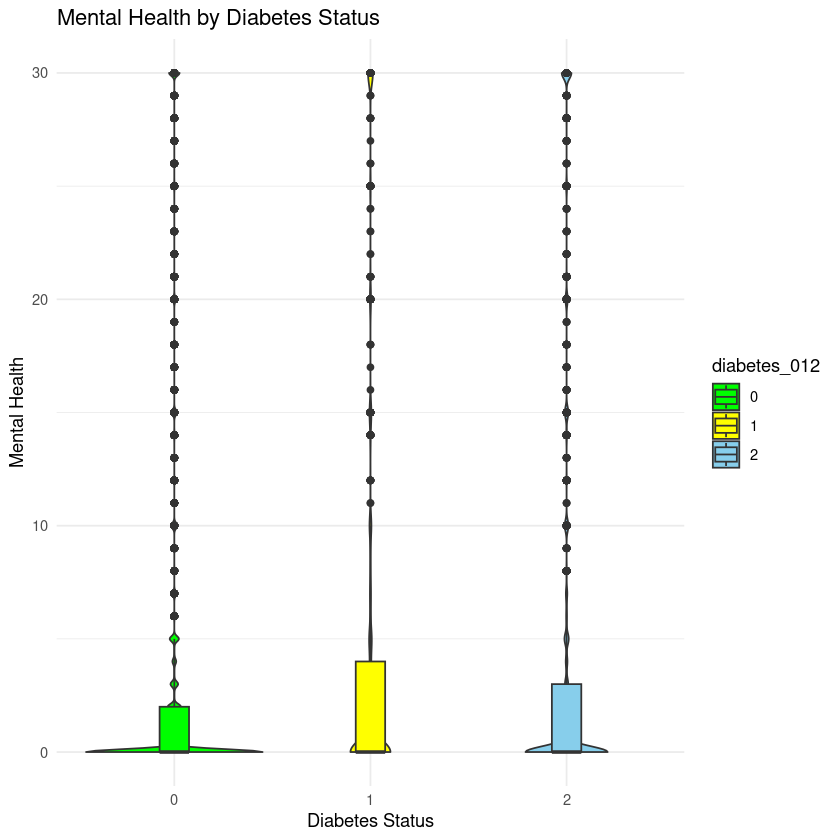

In [97]:
# Plot mental health by diabetes status, violin plot
ggplot(data, aes(x = diabetes_012, y = ment_hlth,fill=diabetes_012)) +
    geom_violin() + geom_boxplot(width = 0.15) +
    scale_fill_manual(values = c("green", "yellow", "skyblue"),breaks = c("0","1","2")) +
    labs(title = "Mental Health by Diabetes Status",
         x = "Diabetes Status",
         y = "Mental Health") +
    theme_minimal()

Ta thực hiện kiểm định ANOVA để kiểm định sự khác biệt về chỉ số `ment_hlth` giữa ba nhóm bệnh nhân.

In [98]:
set.seed(42)
aov_result <- aov(ment_hlth ~ diabetes_012, data = data)
summary(aov_result)

                 Df   Sum Sq Mean Sq F value Pr(>F)    
diabetes_012      2    78369   39185   717.1 <2e-16 ***
Residuals    253677 13861367      55                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Biến `diabetes_012` có ảnh hưởng đáng kể đến `ment_hlth`, với giá trị F rất lớn (717.1) và p-value cực nhỏ (< 2e-16), cho thấy sự khác biệt giữa các nhóm `diabetes_012` về `ment_hlth` là có ý nghĩa thống kê rất cao.

In [99]:
phys_hlth <- data |> group_by(diabetes_012) |> summarise(mean_phys_hlth = mean(phys_hlth), sd_phys_hlth = sd(phys_hlth), count = n())
phys_hlth

diabetes_012,mean_phys_hlth,sd_phys_hlth,count
<fct>,<dbl>,<dbl>,<int>
0,3.582416,7.999205,213703
1,6.348305,10.298013,4631
2,7.954479,11.301491,35346


Ta nhận thấy có sự khác biệt về trung bình chỉ sô `phys_hlth`, ở đó nhóm bệnh nhân bị tiểu đường có số ngày gặp vấn đề về thể chất đứng đầu. Độ biến động ở ba nhóm này cũng rất khác biệt.

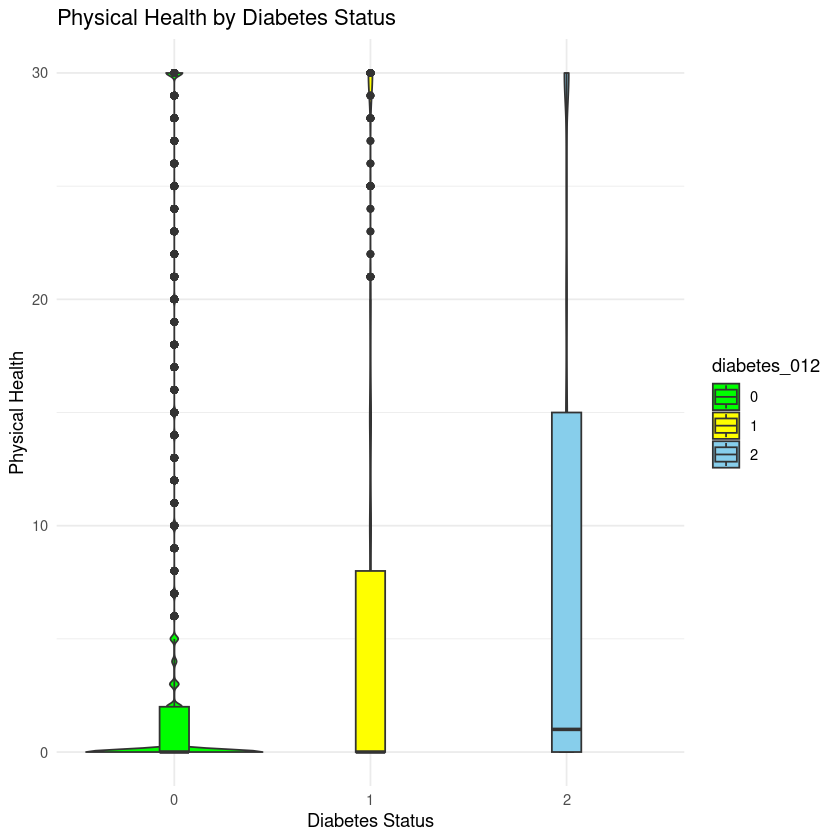

In [100]:
# Plot physical health by diabetes status, violin plot
ggplot(data, aes(x = diabetes_012, y = phys_hlth,fill=diabetes_012)) +
    geom_violin() + geom_boxplot(width = 0.15) +
    scale_fill_manual(values = c("green", "yellow", "skyblue"),breaks = c("0","1","2")) +
    labs(title = "Physical Health by Diabetes Status",
         x = "Diabetes Status",
         y = "Physical Health") +
    theme_minimal()

In [101]:
set.seed(42)
aov_result <- aov(phys_hlth ~ diabetes_012, data = data)
summary(aov_result)

                 Df   Sum Sq Mean Sq F value Pr(>F)    
diabetes_012      2   600673  300337    4079 <2e-16 ***
Residuals    253677 18679609      74                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Biến `diabetes_012` có ảnh hưởng đáng kể đến `phys_hlth`, với giá trị F rất lớn (4079) và p-value cực nhỏ (< 2e-16), cho thấy sự khác biệt giữa các nhóm `diabetes_012` về `phys_hlth` là có ý nghĩa thống kê rất cao.